In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Telco_Customer_Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop('customerID',axis=1,inplace=True)

In [4]:
df.shape

(7043, 20)

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.duplicated().sum()

22

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
# In the above column we can see that the data type of the total charges is object that is we can change this to float or numeric 
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True) 

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
df_numeric=df.select_dtypes(exclude='O')
df_cat=df.select_dtypes(include='O')

In [14]:
df_numeric.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [15]:
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [16]:
df_cat.describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [17]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

## DATA VISUALIZATIONS 

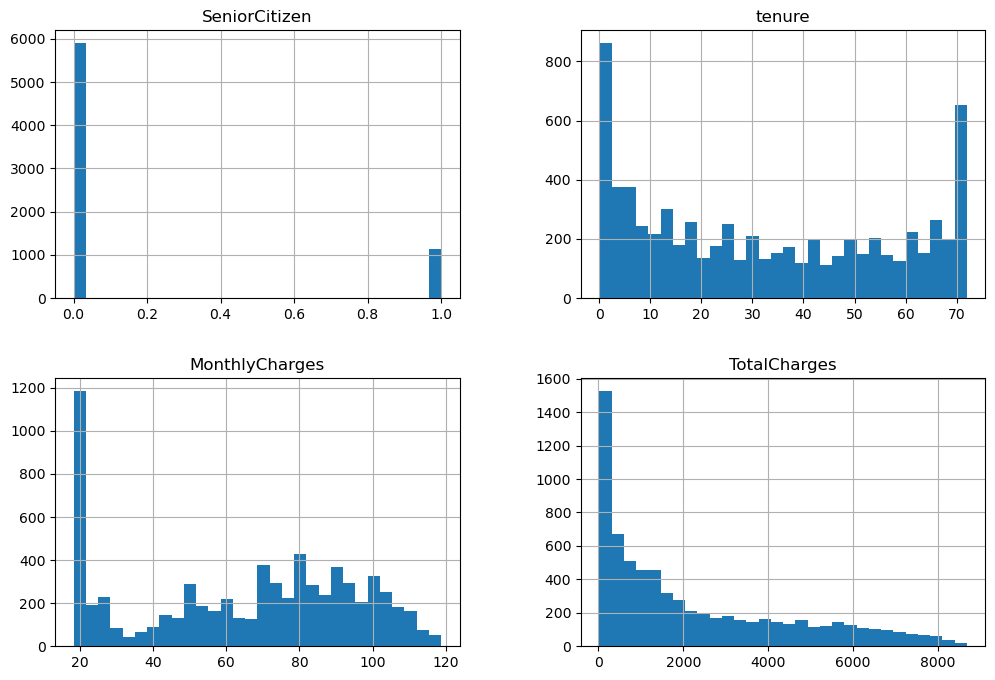

In [19]:
df_numeric.hist(figsize=(12, 8), bins=30)  # Histogram for all numerical columns
plt.show()



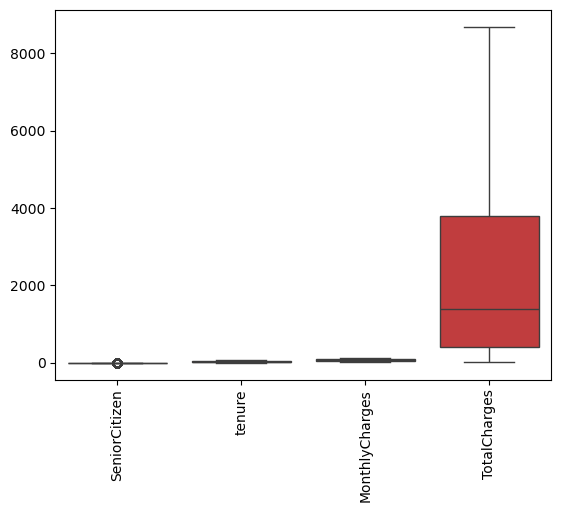

In [20]:
sns.boxplot(data=df_numeric)
plt.xticks(rotation=90)
plt.show()

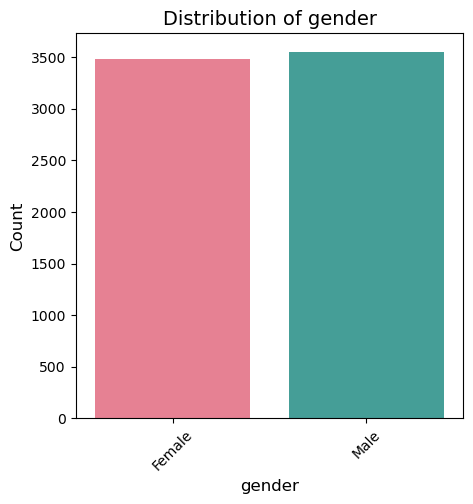

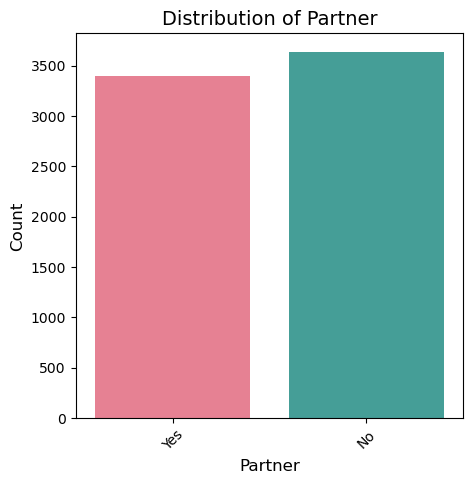

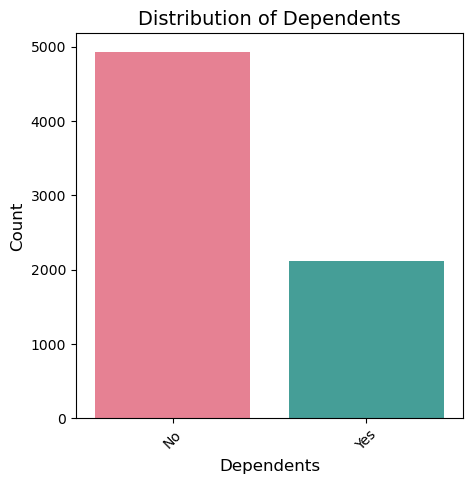

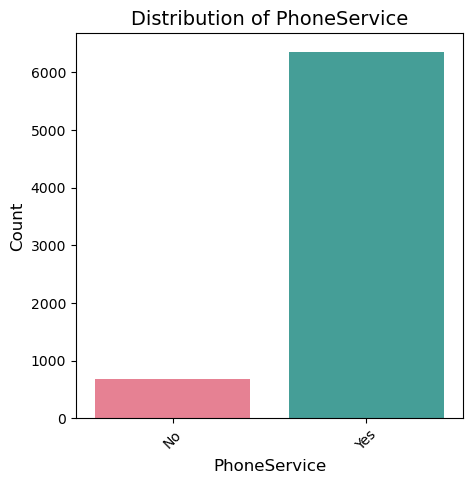

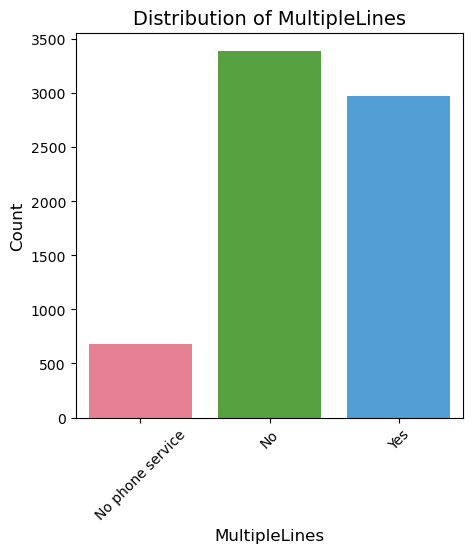

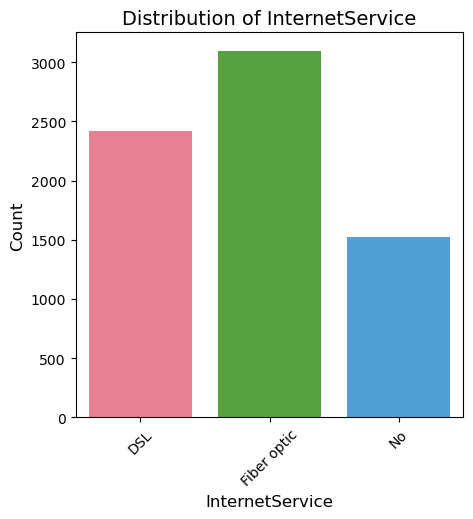

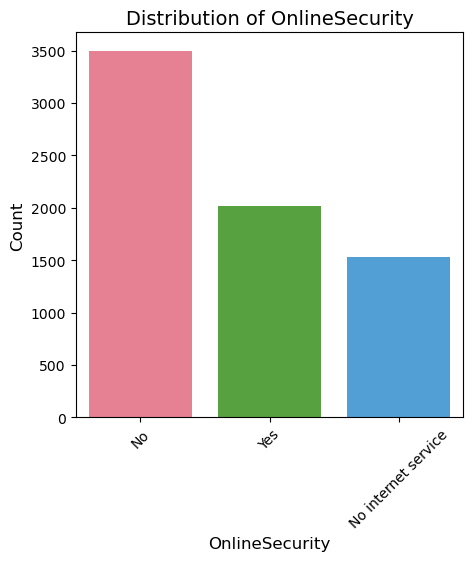

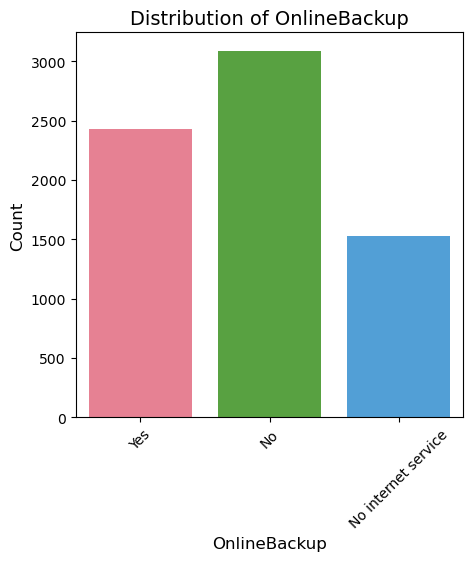

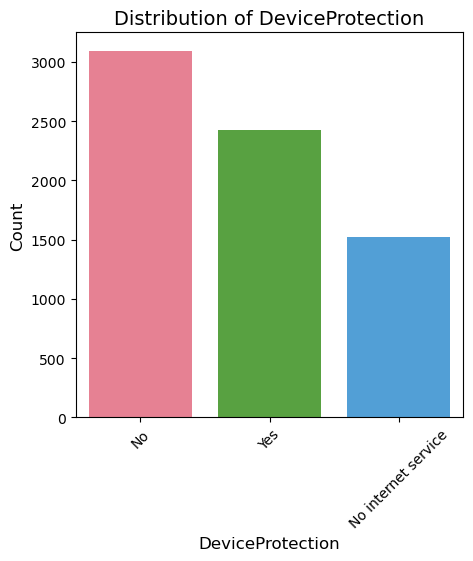

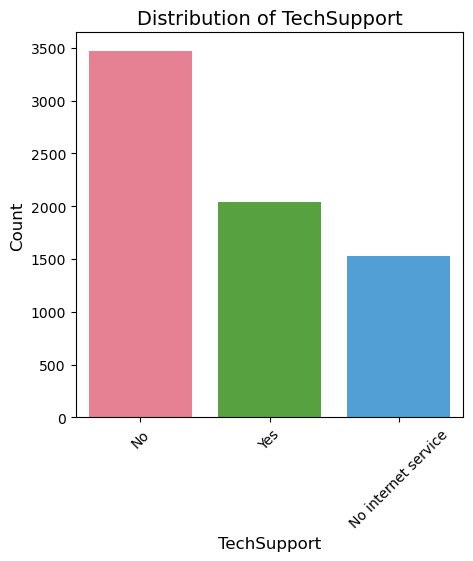

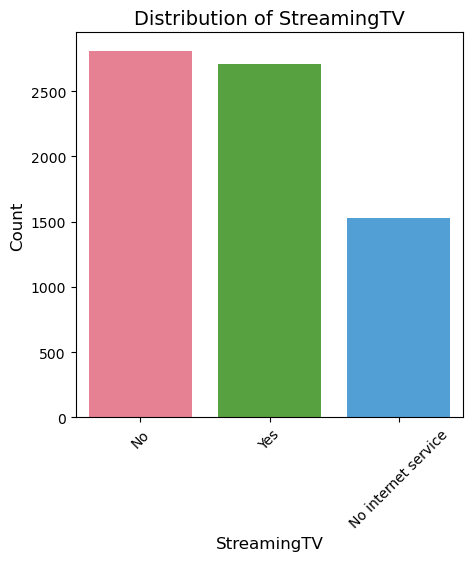

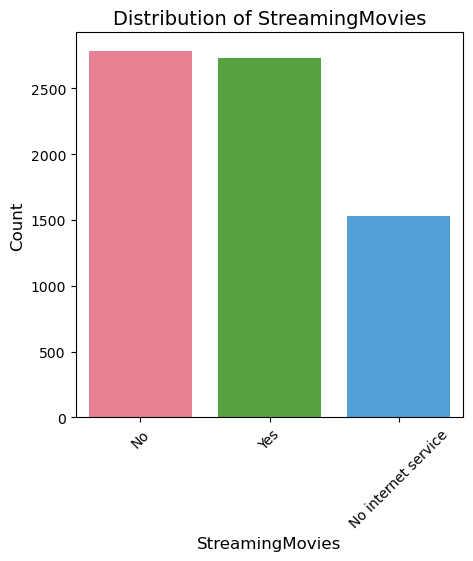

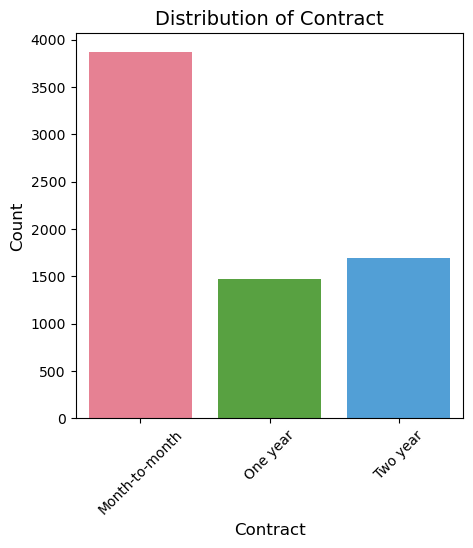

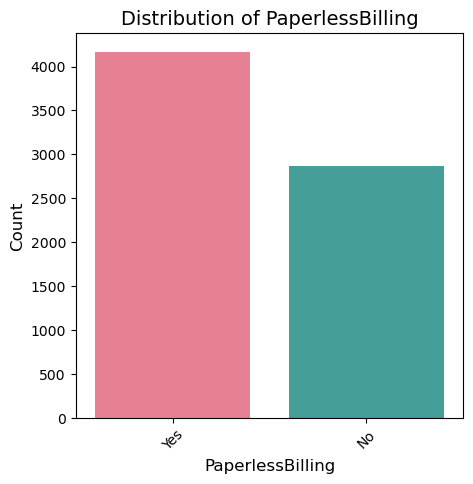

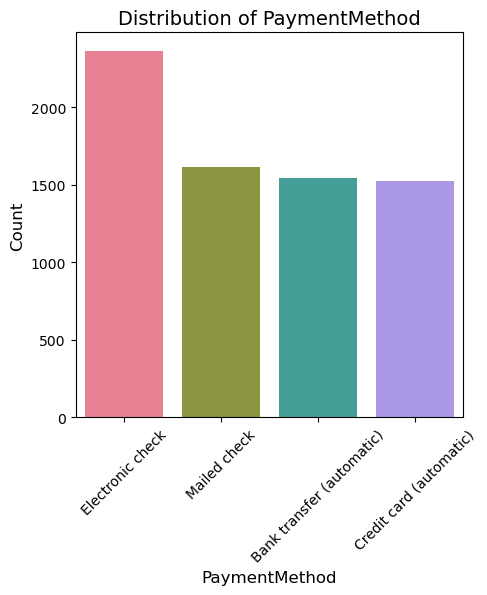

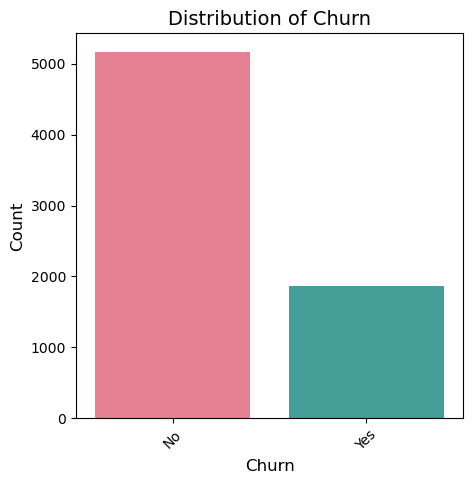

In [21]:
for col in df.select_dtypes(include="object").columns:
    plt.figure(figsize=(5, 5))
    ax = sns.countplot(x=col, data=df,palette="husl")
    ax.set_xlabel(col, fontsize=12)  # Set x-axis label
    ax.set_ylabel("Count", fontsize=12)  # Set y-axis label
    ax.set_title(f"Distribution of {col}", fontsize=14)  # Set title
    plt.xticks(rotation=45)  # Rotate x-axis labels
    plt.show()


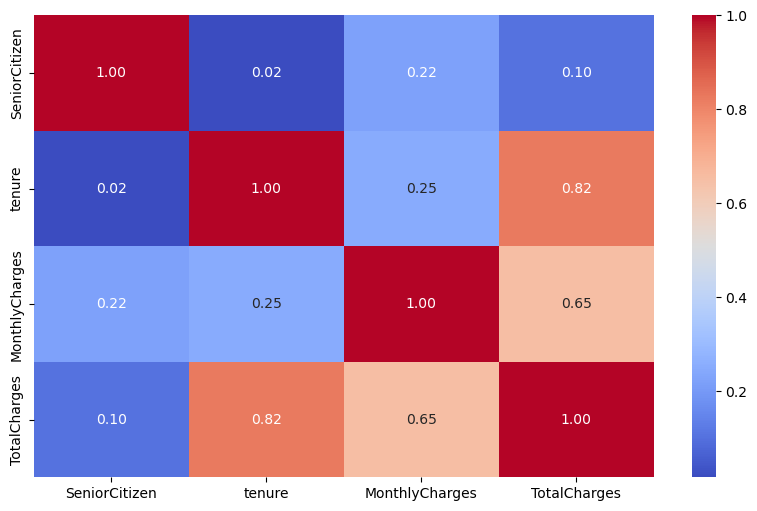

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


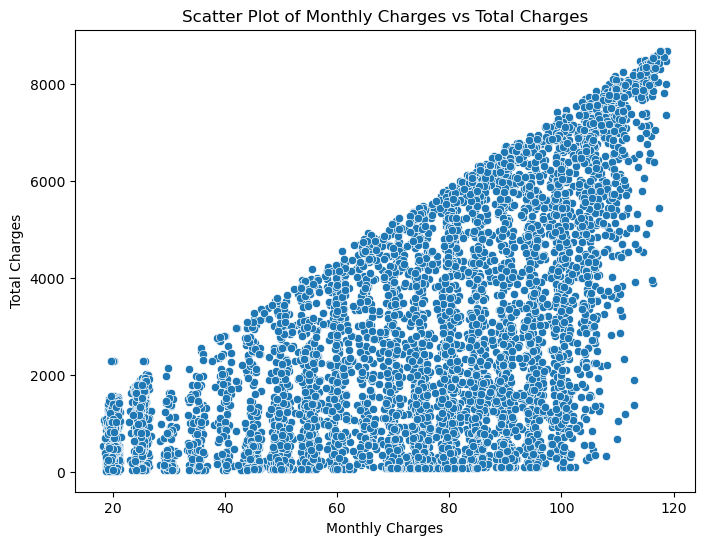

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["MonthlyCharges"], y=df["TotalCharges"])
plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")
plt.title("Scatter Plot of Monthly Charges vs Total Charges")
plt.show()


In [24]:
df_cat['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_cat['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [25]:
df_cat['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [26]:
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1


In [27]:
df_dummies=pd.get_dummies(df_cat)

<Axes: >

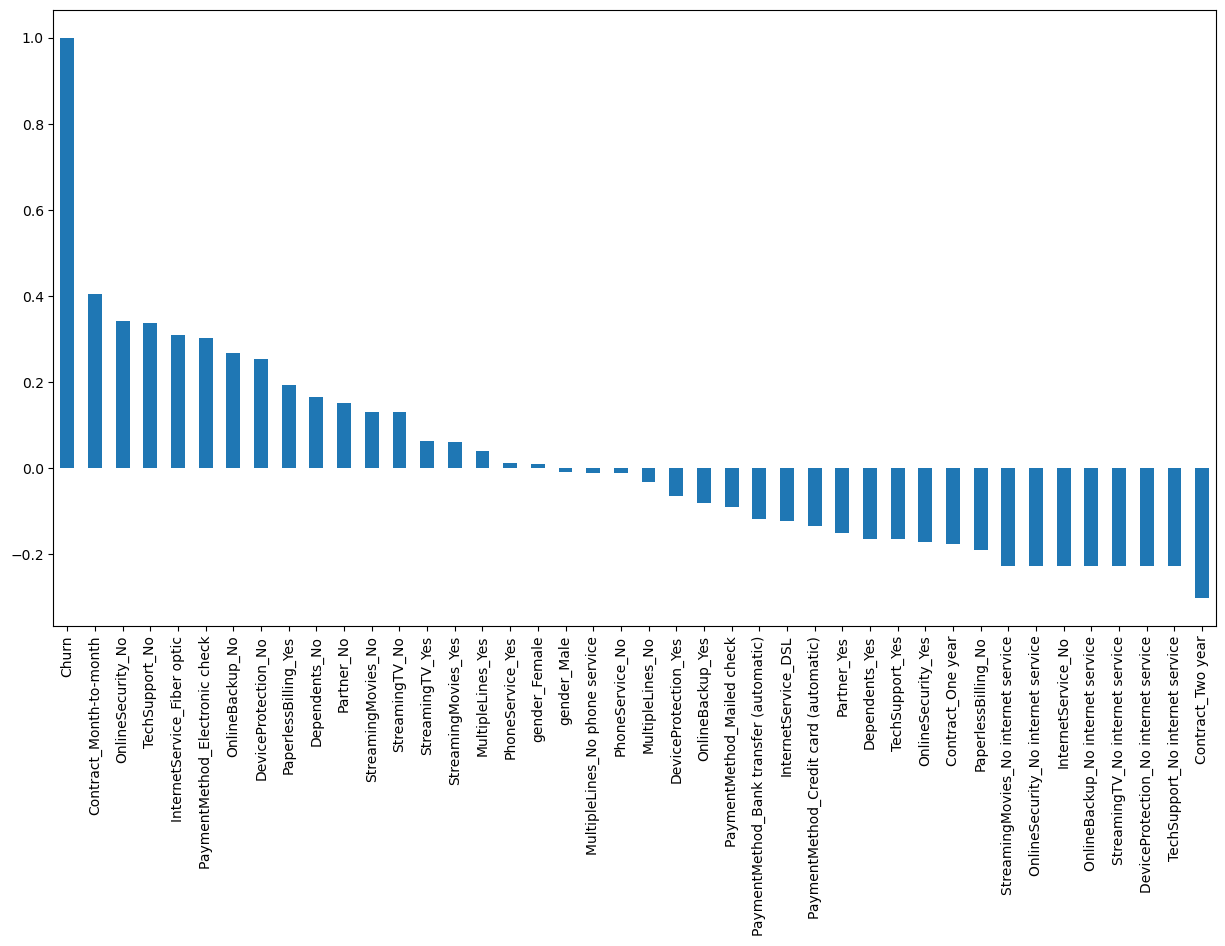

In [28]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

## Intepretation
Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables.

### 1. Positive Correlation with Churn (Higher churn likelihood)

Month-to-month contracts → Customers with month-to-month contracts have a higher likelihood of churning compared to those on long-term contracts. Reason: These customers have more flexibility to leave at any time without penalties.

Absence of online security & tech support → Customers who do not have these services are more likely to churn. Reason: They might perceive the service as less valuable or feel unsupported when they face technical issues, leading them to switch providers.

### 2. Negative Correlation with Churn (Lower churn likelihood)

Long tenure & Two-year contracts → Customers with longer tenure or two-year contracts are less likely to churn.Reason: Longer contracts create a commitment and reduce flexibility to switch. Additionally, customers who have been with the company for a long time may be more satisfied or accustomed to the service.

Services like online security, streaming TV, online backup, and tech support (without internet) → Customers subscribing to these services tend to churn less.Reason: These services increase engagement and customer dependence on the provider, making switching providers less attractive.

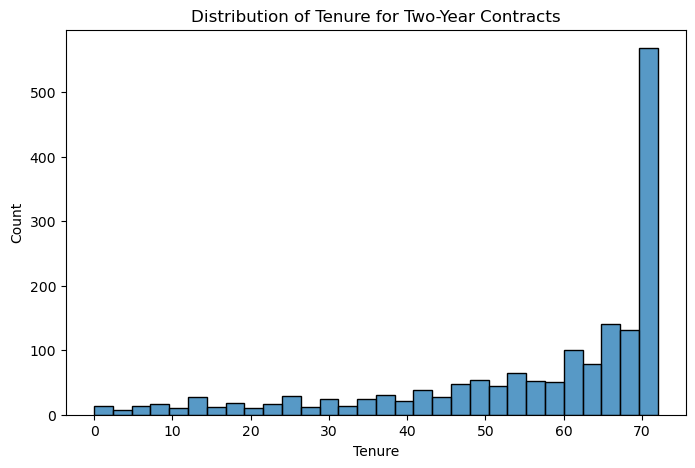

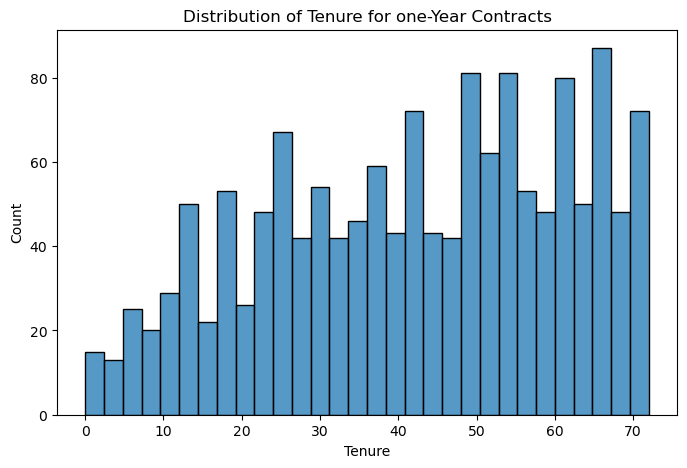

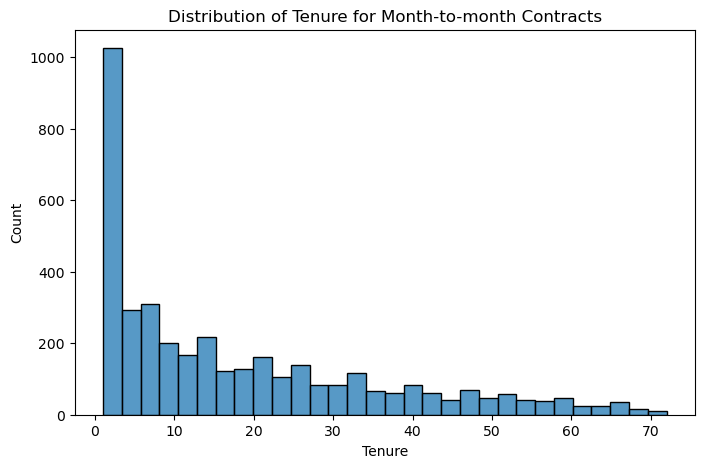

In [30]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df['Contract'] == 'Two year']['tenure'], bins=30, kde=False)

plt.xlabel("Tenure")
plt.ylabel("Count")
plt.title("Distribution of Tenure for Two-Year Contracts")
plt.show()


plt.figure(figsize=(8, 5))
sns.histplot(df[df['Contract'] == 'One year']['tenure'], bins=30, kde=False)

plt.xlabel("Tenure")
plt.ylabel("Count")
plt.title("Distribution of Tenure for one-Year Contracts")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df[df['Contract'] == 'Month-to-month']['tenure'], bins=30, kde=False)

plt.xlabel("Tenure")
plt.ylabel("Count")
plt.title("Distribution of Tenure for Month-to-month Contracts")
plt.show()

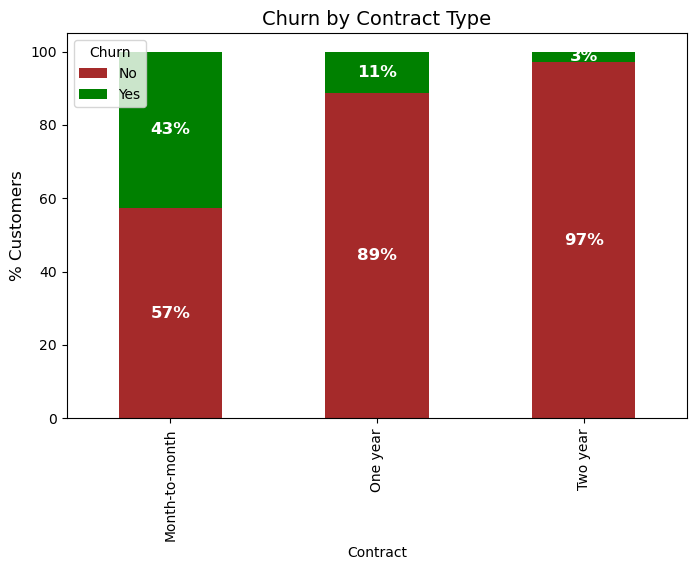

In [31]:
contract_churn = df.groupby(['Contract', 'Churn']).size().unstack()
contract_churn = (contract_churn.T * 100 / contract_churn.T.sum()).T  # Convert to percentage

# Plot stacked bar chart
ax = contract_churn.plot(kind='bar', stacked=True, figsize=(8, 5), color=['brown', 'green'])

# Labels & Title
ax.set_ylabel('% Customers', fontsize=12)
ax.set_title('Churn by Contract Type', fontsize=14)
ax.legend(title='Churn', labels=['No', 'Yes'])

# ✅ Add percentage labels inside bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    
    # Place label only if height > 0 (avoid empty bars)
    if height > 0:
        ax.annotate(f'{height:.0f}%',  
                    (x + width / 2, y + height / 2),  # Center of the bar
                    ha='center', va='center',  
                    color='white', fontsize=12, fontweight='bold')

plt.show()




In [32]:
df_dummies

,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,True,False,False,True,True,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
1,0,False,True,True,False,True,False,False,True,True,...,False,False,True,False,True,False,False,False,False,True
2,1,False,True,True,False,True,False,False,True,True,...,False,True,False,False,False,True,False,False,False,True
3,0,False,True,True,False,True,False,True,False,False,...,False,False,True,False,True,False,True,False,False,False
4,1,True,False,True,False,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,False,True,False,True,False,True,False,True,False,...,True,False,True,False,False,True,False,False,False,True
7039,0,True,False,False,True,False,True,False,True,False,...,True,False,True,False,False,True,False,True,False,False
7040,0,True,False,False,True,False,True,True,False,False,...,False,True,False,False,False,True,False,False,True,False
7041,1,False,True,False,True,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,True


In [33]:
df_numeric

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [34]:
df2 = pd.concat([df_dummies, df_numeric], axis=1)
df2

,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,True,False,False,True,True,False,True,False,False,...,False,True,False,False,True,False,0,1,29.85,29.85
1,0,False,True,True,False,True,False,False,True,True,...,True,False,False,False,False,True,0,34,56.95,1889.50
2,1,False,True,True,False,True,False,False,True,True,...,False,True,False,False,False,True,0,2,53.85,108.15
3,0,False,True,True,False,True,False,True,False,False,...,True,False,True,False,False,False,0,45,42.30,1840.75
4,1,True,False,True,False,True,False,False,True,True,...,False,True,False,False,True,False,0,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,False,True,False,True,False,True,False,True,False,...,False,True,False,False,False,True,0,24,84.80,1990.50
7039,0,True,False,False,True,False,True,False,True,False,...,False,True,False,True,False,False,0,72,103.20,7362.90
7040,0,True,False,False,True,False,True,True,False,False,...,False,True,False,False,True,False,0,11,29.60,346.45
7041,1,False,True,False,True,True,False,False,True,False,...,False,True,False,False,False,True,1,4,74.40,306.60


### UNDERSAMPLIMG

In [36]:
#X.shape,y.shape

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




X = df2.drop('Churn', axis=1)
y = df2['Churn']



In [38]:
# Create Train & Test Data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
scaler = StandardScaler()  # Initialize standard scaler

# Fit and transform training data, transform test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [40]:
# Running logistic regression model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [41]:
from sklearn import metrics
prediction_test = model.predict(X_test)

# Print the prediction accuracy

print (metrics.accuracy_score(y_test, prediction_test))

0.807382867960246


Axes(0.125,0.11;0.775x0.77)


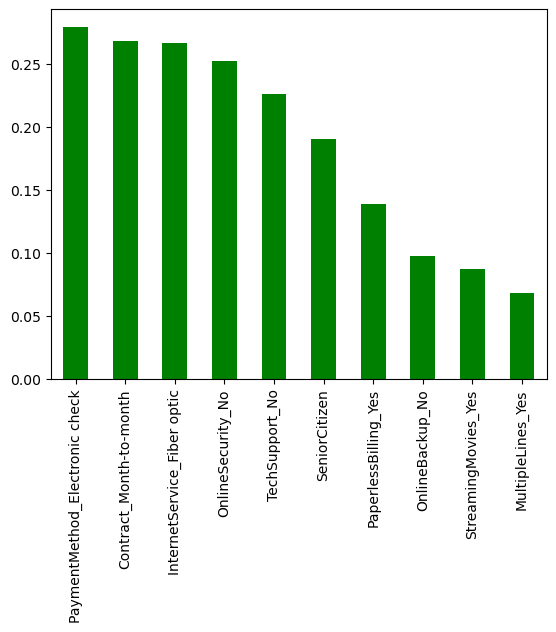

In [42]:
# To get the weights of all the variables

weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar', color = 'green'))

Axes(0.125,0.11;0.775x0.77)


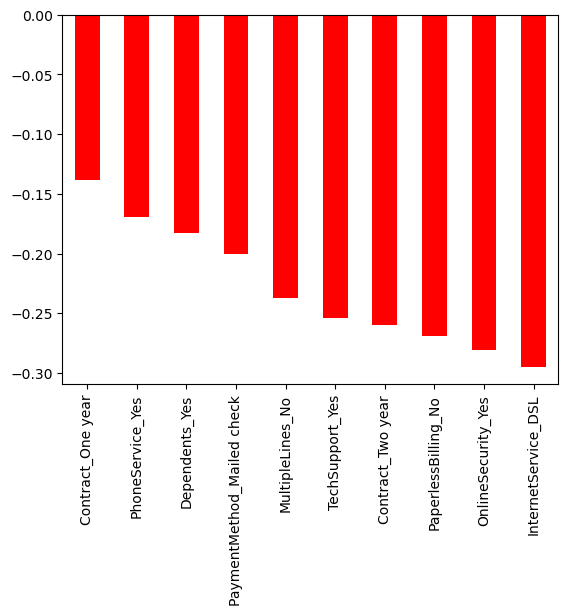

In [43]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar', color = 'red'))


In [44]:
y_test.value_counts(normalize=True)

Churn
0    0.728348
1    0.271652
Name: proportion, dtype: float64

## SVM 

In [46]:
# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)


SVC(probability=True, random_state=42)

In [47]:
# Predict on test data
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")


Model Accuracy: 80.12%



Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.69      0.50      0.58       574

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



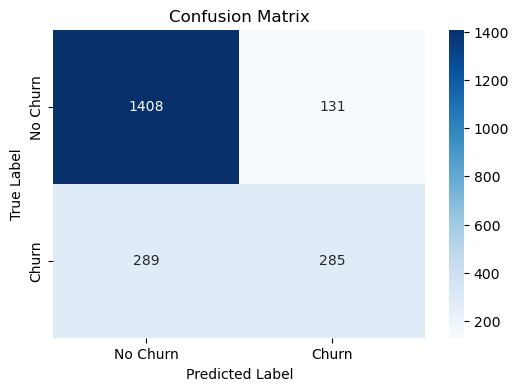

In [48]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## After finding best parameter re train svm

In [50]:
# Initialize and train the SVM model
svm_model = SVC(kernel='linear', C=1, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)


SVC(C=1, kernel='linear', probability=True, random_state=42)

In [51]:
# Predict on test data
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")


Model Accuracy: 80.69%


### XGBOOST

In [53]:
import xgboost as xgb

In [54]:
# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Model Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.68      0.55      0.61       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



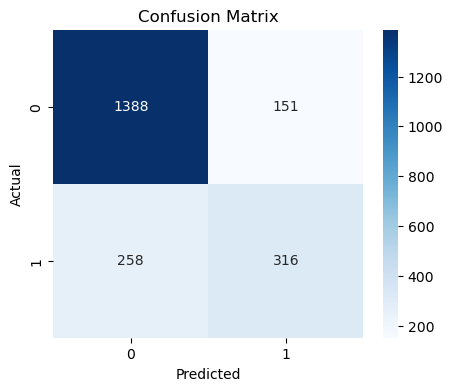

In [55]:
# Predict on test data
y_pred = xgb_model.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


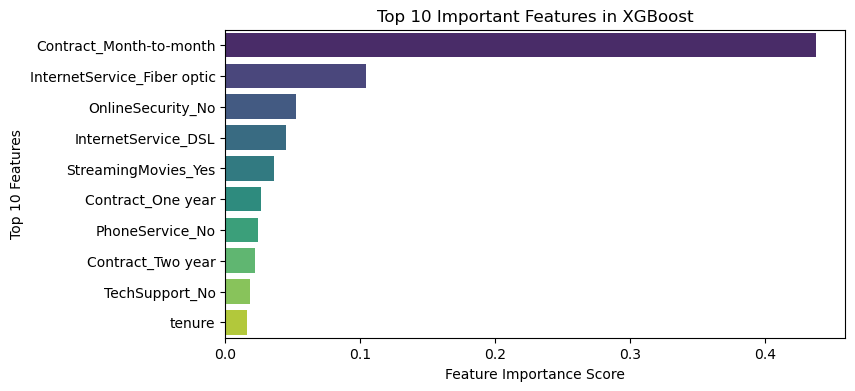

In [56]:
import pandas as pd

# Get feature importance
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot top 10 important features
plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Top 10 Features")
plt.title("Top 10 Important Features in XGBoost")
plt.show()


### RANDOM FOREST 

In [58]:
from sklearn.ensemble import RandomForestClassifier
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [59]:
# Predic# Predict on test data
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")


Model Accuracy: 79.46%


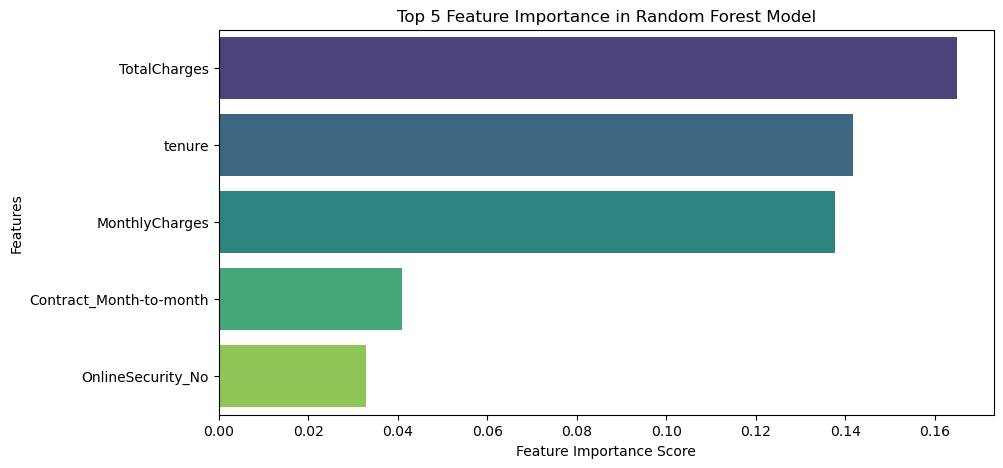

In [60]:
# Get feature importance and sort them in descending order
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Select top 5 features
top_5_features = feature_importance.head(5)

# Plot the top 5 feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_features, y=top_5_features.index, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 5 Feature Importance in Random Forest Model")
plt.show()


## ADA BOOST

In [62]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value)
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.804070042593469

### ANN

In [64]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [65]:
# Initialize ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dropout(0.3),  # Prevent overfitting
    Dense(32, activation='relu'),  # Hidden layer
    Dropout(0.2),
    Dense(16, activation='relu'),  # Another hidden layer
    Dense(1, activation='sigmoid')  # Output layer (Sigmoid for binary classification)
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [66]:
# Train ANN
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.6499 - loss: 35.7399 - val_accuracy: 0.2717 - val_loss: 8.0512
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.6447 - loss: 7.4544 - val_accuracy: 0.7293 - val_loss: 0.7629
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.6412 - loss: 3.6873 - val_accuracy: 0.7364 - val_loss: 0.9933
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.6538 - loss: 2.0678 - val_accuracy: 0.7198 - val_loss: 0.8295
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.6673 - loss: 1.2250 - val_accuracy: 0.5282 - val_loss: 0.6855
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.6566 - loss: 0.8868 - val_accuracy: 0.7283 - val_loss: 0.5712
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.7054 - loss: 0.7747 - val_accuracy: 0.7283 - val_loss: 0.5657
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.7311 - loss: 0.6581 - val_ac

67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
Model Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1539
           1       0.66      0.44      0.53       574

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.70      2113
weighted avg       0.77      0.79      0.77      2113



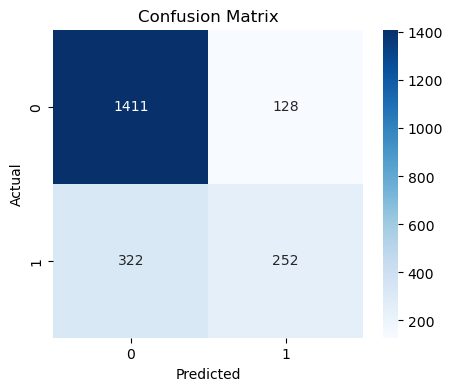

In [67]:
# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary values

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### PREDICTION

In [69]:
X_new = X_test.iloc[[0,1,2,3,4]]  # Selecting specific rows
#X_new = X_test.sample(n=50, random_state=42)  # Select 5 random samples from test data

X_new_scaled = scaler.transform(X_new)  # Apply the same scaling as training data
y_new_pred = rf_model.predict(X_new)  # For Random Forest
print("Predicted Churn Output:", y_new_pred)
y_prob = rf_model.predict_proba(X_new)[:, 1]  # Probability of churn
print("Churn Probability:", y_prob)




Predicted Churn Output: [1 0 0 0 0]
Churn Probability: [0.67 0.07 0.   0.44 0.02]


## SVM

In [71]:
# Apply the same scaling as training data
X_new_scaled = scaler.transform(X_new)  

# Predict churn (probabilities)
y_new_prob = model.predict(X_new_scaled)  

# Convert probabilities to binary values (0 or 1)
y_new_pred = (y_new_prob > 0.5).astype("int32")  

print("Predicted Churn Output:", y_new_pred.flatten())  # Convert array to readable format
print("Churn Probability:", y_new_prob.flatten())  # Probabilities for each customer

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
Predicted Churn Output: [1 0 0 0 0]
Churn Probability: [0.58218354 0.16284849 0.16520984 0.42131004 0.16696301]


In [ ]:
0